# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


### reshape메서드에 대한 간단한 연습

In [2]:
a = np.array([[1,2, 3],[4, 5,6]])
print(a.shape)
print('\n')

# reshape메서드에서 -1을 쓰면 나머지 영역은 flatten하게 묶어서 하나의 차원으로 바꿈
a = a.reshape(3, -1)
print(a.shape)
print(a)

(2, 3)


(3, 2)
[[1 2]
 [3 4]
 [5 6]]


---

## Load Dataset
- MNIST dataset

(그냥 다운 받아도 되지만 보통 문서->user->.keras에서 데이터셋을 찾으면 됌)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape) # 6000개의 (28 x 28)크기 픽셀이미지
print(y_train.shape) # 6000개의 인식결과(훈련 데이터)

(60000, 28, 28)
(60000,)


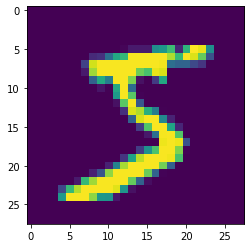

Label:  5


In [5]:
# train data(훈련 데이터)
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

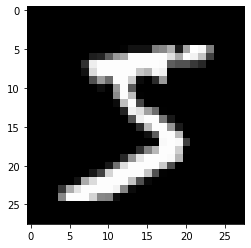

In [6]:
# train data(훈련 데이터)
plt.imshow(X_train[0], cmap='gray')

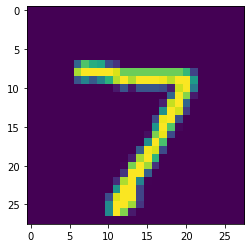

Label:  7


In [7]:
# train data(학습 데이터)
plt.imshow(X_test[0])    # show first number in the dataset X_test
plt.show()
print('Label: ', y_test[0])

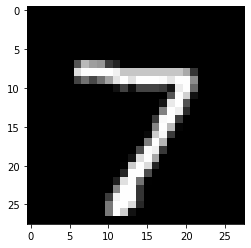

Label:  7


In [8]:
# train data(학습 데이터)
plt.imshow(X_test[0], cmap='gray')    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

---

In [9]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
print('shape of X_train_before = ', X_train.shape)
#reshaping X data : (n,28,28) ---> (n,784)
X_train = X_train.reshape((X_train.shape[0], -1))  
X_test = X_test.reshape((X_test.shape[0], -1))

print('shape of X_train_after = ', X_train.shape)
print('\n')


# 밑에는 Tuple로 결과값을 받환받는 것!
# use only 33% of training data to expedite the training process(데이터가 너무 많아서)
X_train, _ , y_train, _ = train_test_split(X_train, y_train, 
                                           test_size = 0.67, 
                                           random_state = 7)

print('shape of X_train_splited = ', X_train.shape)
print(y_train)

shape of X_train_before =  (60000, 28, 28)
shape of X_train_after =  (60000, 784)


shape of X_train_splited =  (19800, 784)
[6 9 2 ... 5 5 3]


In [10]:
# 이 셀은 run하면 계속 바뀌니까 한 번만 할 것!

# converting y data into categorical (<<<one-hot encoding>>>>)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# one-hot encoding 원리
# 0 -> 1 0 0
# 1 -> 0 1 0
# 2 -> 0 0 1

print(y_train)
print(y_train.shape)  # y_train의 value가 0~9까지 있어서 총 10개!

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(19800, 10)


In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


---

# Basic MLP model

In [12]:
model = Sequential() # model계층을 선형으로 쌓겠다는 의미(keras.models.sequential() 메서드임)

In [13]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

#위의 코드와 같은 것으로
# model.add(layers.Dense(50, activation='sigmoid', input_shape=(784,)  ))
# model.add(layers.Dense(50, activation='sigmoid'))
# model.add(layers.Dense(50, activation='sigmoid'))
# model.add(layers.Dense(50, activation='sigmoid'))
# model.add(layers.Dense(10, activation='softmax'))
# 를 쓸 수 있음

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### softmax 함수

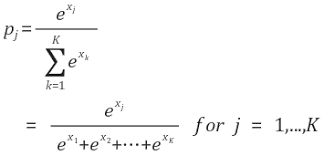

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)               

#### Cross Entropy

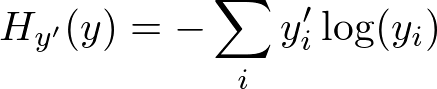

- y =  우리의 neural net이 예측한 정답 label의 값
- y' =  실제 정답 label의 값
- i = 분류하고자 하는 class의 개수 및 시그마의 인덱스

간혹 우리 neural net의 예측값이 0이거나 0과 가까운 매우 작은 숫자일 경우 log 뒤의 y(i)의 값은 무한대로 수렴하게 된다. (이해가 되지 않는다면 위 그래프에서 y가 0.00000000001일 때의 x값을 찾아보라)

여기서 무한대로 수렴한다는 것은 분명 유쾌한 일이 아니다.

그러므로 **이런 경우를 대비해서 y(i)에 1e-07 ( 0.0000001 ) 정도를 더해준다. // y'log(y+0.0000001)**

이렇게 하면 cost 값에는 크게 영향을 주지 않으면서 무한대의 만행을 어느정도 막아낼 수 있다.


출처: https://worthpreading.tistory.com/23 [Worth spreading]

In [15]:
# 모델을 학습시키기 이전에, compile 메소드를 통해서 학습 방식에 대한 환경설정을 해야 합니다.

sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감


model.compile(optimizer = sgd,
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## 훈련(학습)
### keras.sequential().fit(X_train, y_train, batch_size = k, validation_split=(alpha), epochs=n, verbose=(0 or 1))

- **X_train, y_train** : 훈련데이터들
- **batch_size** : 미니 배치들의 사이즈. 입력값 k는 자연수 (자세한 설명은 아래 참고 블로그의 설명 참조)
- **validation_split** : 모델의 프로토타입을 만들기 위해서 검증할 수 있는 데이터가 필요한데 train데이터의 일부를 가져다 씀.
                    한 에포크가 끝날 때마다 전달된 데이터의 손실과 metrics를 측정한 지표를 나타냄. 입력값은 0이상 1이하의 수
- **epochs** : 전체 train데이터로 학습을 반복하는 횟수로 입력값은 정수
- **verbose** : 학습과정 출력 여부를 나타내는 옵션. 0은 안나타내고 1은 나타나는데 default는 1.

참고 : https://tykimos.github.io/2017/03/25/Fit_Talk/(배치사이즈의 이해를 위해서 꼭 볼것!)

In [16]:
# 위에서 나뉘어진 X_train셋을 다시 0.7만 가지고 학습을 시키고 
# 나머지 0.3은 검증을 하는데 쓰임

history = model.fit(X_train, y_train, 
                    batch_size = 256, 
                    validation_split = 0.3,   
                    epochs = 200,
                    verbose = 0)

In [17]:
# 한 에포크가 끝날 때마다 아래의 데이터프레임에서 row 하나씩 출력한다고 생각하면 됌
import pandas as pd
pd.DataFrame(history.history)

,val_loss,val_accuracy,loss,accuracy
0,2.453383,0.092929,2.461490,0.101371
1,2.434104,0.092929,2.440724,0.101371
2,2.417777,0.092929,2.423472,0.101371
3,2.403805,0.092929,2.408787,0.101371
4,2.391735,0.092929,2.396104,0.101371
...,...,...,...,...
195,2.297841,0.111785,2.296343,0.114286
196,2.297816,0.111785,2.296318,0.114286
197,2.297797,0.111785,2.296294,0.114286
198,2.297773,0.111785,2.296270,0.114286


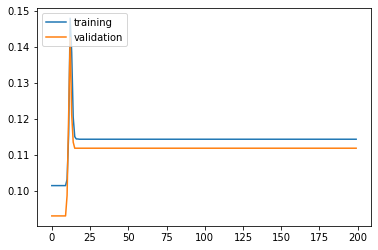

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [19]:
results = model.evaluate(X_test, y_test) # loss value와 [metrics로 지정한 accuracy]가 tuple형식으로 나옴
print(results)

10000/10000 [==============================] - 0s 21us/step
[2.2969733211517336, 0.11349999904632568]


In [20]:
print('Test accuracy: ', results[1]) # accuracy만 받기

Test accuracy:  0.11349999904632568


---

딥러닝 학습에 있어 초기 가중치 설정은 매우 중요한 역활을 한다. 가중치를 잘못 설정할 경우 기울기 소실 문제나 표현력의 한계를 갖는 등 여러 문제를 야기하게 된다. 또한 딥러닝의 학습의 문제가 non-convex 이기 때문에 가중치의 초기값을 잘못 설정할 경우 local minimum에 수렴할 가능성이 커지게 된다.

초기값 설정을 잘못해 문제가 발생하는 경우들을 살펴보자.

1) 초기값을 모두 0으로 설정한 경우

만약 데이터를 평균 0정도로 정규화시킨다면, 가중치를 0으로 초기화 시킨다는 생각은 꽤 합리적으로 보일 수 있다. 그러나 실제로 0으로 가중치를 초기화 한다면 모든 뉴런들이 같은 값을 나타낼 것이고, 역전파 과정에서 각 가중치의 update가 동일하게 이뤄질 것이다. 이러한 update는 학습을 진행 해도 계속해서 발생할 것이며, 결국 제대로 학습하기 어려울 것이다. 또한 이러한 동일한 update는 여러 층으로 나누는 의미를 상쇄시킨다.

2) 활성화 함수로 sigmoid 사용시 정규 분포 사용

지난 포스트에서 확인했듯이 sigmoid함수는 input의 절대값이 조금이라도 커지게 되면 미분값이 소실되는 문제가 발생한다는 것을 확인했다. 이 경우에 평균 0이고 표준편차가 1인 정규분포를 따르도록 가중치를 랜덤하게 초기화 한다고 가정하자. gradient vanishing의 경우에는 표준편차가 크기 때문에 학습을 반복할 수록 가중치 값들이 0,1 로 치우치는 문제 발생한다. 물론 Activation Function을 바꿈으로써 해결 할 수도 있겠지만, 가중치 초기화를 잘 설정함으로써도 어느정도 해결할 수 있다.

3) 2의 case에서 표준편차를 줄였을 경우

2의 문제를 확인하고 표준편차가 커 |x|값이 커지면서 기울기가 소실되는 문제를 확인했기 때문에, 표준편차를 줄여서 |x|값을 줄이려는 생각을 가지고 표준편차를 0.01로 설정한다고 가정하자. 이 경우에는 또다른 문제가 발생한다.
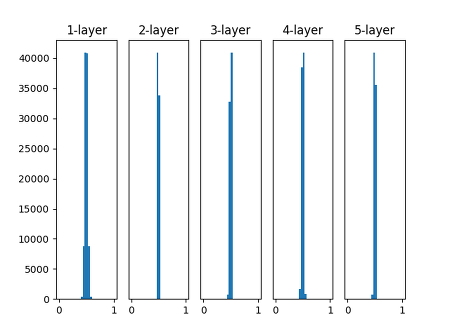
이렇게 표준편차를 적게 하면 층이 깊어질 수록 가중치 값들이 중간값인 0.5 부근에 몰리는 문제를 확인할 수 있을 것이다.

출처 : https://reniew.github.io/13/

## 1. Weight Initialization

### Xavier
Xaiver함수는 비선형함수(ex. **sigmoid, tanh**)에서 효과적인 결과를 보여준다. 하지만 ReLU함수에서 사용 시 출력 값이 0으로 수렴하게 되는 현상을 확인 할 수 있다. 따라서 ReLU함수에는 또 다른 초기화 방법을 사용해야 한다. 다음과 같은 두가지 방법이 있다.

- **Xavier Normal Initialization**
\begin{align}
W \sim N(0,Var(W))
\end{align}

Here, $Var(W) = \sqrt{\frac{2}{n_{in}+n_{out}}}$, where $n_{in}$은 이전 layer의 노드 수, $n_{out}$은 다음 layer의 노드수

- **Xavier Uniform Initialization** : 
\begin{align}
W \sim U(- \sqrt{\frac{6}{n_{in}+n_{out}}}, \sqrt{\frac{6}{n_{in}+n_{out}}})
\end{align}

Here, $Var(W) = \sqrt{\frac{2}{n_{in}+n_{out}}}$, where $n_{in}$은 이전 layer(input)의 노드 수, $n_{out}$은 다음 layer(output)의 노드수

### HE
ReLU를 활성화 함수로 사용 시 Xavier 초기값 설정이 비효율적인 결과를 보이는 것을 확인할 수 있는데, 이런 경우 He initialization을 사용한다. 이 방법 또한 정규분포와 균등분포 두가지 방법이 사용된다.(He et al. ,2015)
- **He Normal Initialization**
\begin{align}
W \sim N(0,Var(W))
\end{align}

Here, $Var(W) = \sqrt{\frac{2}{n_{in}}}$, where $n_{in}$은 이전 layer(input)의 노드 수
- **Normal distribution**
\begin{align}
W \sim U(- \sqrt{\frac{6}{n_{in}}}, \sqrt{\frac{6}{n_{in}}})
\end{align}

Here, $Var(W) = \sqrt{\frac{2}{n_{in}+n_{out}}}$, where $n_{in}$은 이전 layer(input)의 노드 수

### Bias 초기화
가중치 초기화 뿐만 아니라 편향(bias) 초기값 또한 초기값 설정 또한 중요하다.
보통의 경우에는 Bias는 0으로 초기화 하는 것이 일반적이다. ReLU의 경우 0.01과 같은 작은 값으로 b를 초기화 하는 것이 좋다는 보고도 있지만 모든 경우는 아니라 일반적으로는 0으로 초기화 하는 것이 효율적이다.

----
### Conclusion
- Sigmoid, tanh 경우 Xavier 초기화 방법이 효율적이다.
- ReLU계의 활성화 함수 사용 시 He 초기화 방법이 효율적이다.
- **최근의 대부분의 모델에서는 He초기화를 주로 선택한다.**
마지막으로, 대부분의 초기화 방법이 Normal Distribution과 Uniform Distribution을 따르는 두가지 방법이 있는데 이에대한 선택 기준에 대해서는 명확한 것이 없다. 하지만 He의 논문의 말을 인용하면,

> 최근의 Deep CNN 모델들은 주로 Gaussian Distribution을 따르는 가중치 초기화 방법을 사용한다.

따라서 Deep CNN의 경우 보통의 Gaussian 초기화 방법을 사용해 볼 수 있다.하지만 여러 초기화 방법들을 테스트하며 사용하는 것이 가장 좋은 방법일 것이다.

출처 : https://reniew.github.io/13/

---

In [21]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

In [23]:
# 한 에포크가 끝날 때마다 아래의 데이터프레임에서 row 하나씩 출력한다고 생각하면 됌
pd.DataFrame(history.history)

,val_loss,val_accuracy,loss,accuracy
0,2.347788,0.103704,2.436879,0.101443
1,2.308579,0.103704,2.327141,0.101443
2,2.300278,0.107576,2.304775,0.104329
3,2.298249,0.107407,2.299180,0.120779
4,2.297343,0.112121,2.297310,0.114791
...,...,...,...,...
95,2.107040,0.497811,2.107576,0.500433
96,2.100854,0.495118,2.101327,0.505844
97,2.094350,0.497811,2.094868,0.505772
98,2.087676,0.495623,2.088147,0.505556


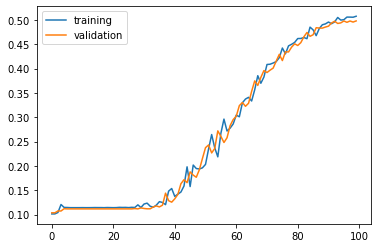

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [25]:
results = model.evaluate(X_test, y_test)

# loss값과 accuracy값을 리턴함
print(results)

10000/10000 [==============================] - 0s 25us/step
[2.0776548194885254, 0.5016999840736389]


In [26]:
print('Test accuracy: ', results[1])

Test accuracy:  0.5016999840736389


위에서 했던 것보다 accuracy는 높지 않지만 여전히 불만족스러움...
그래서 이번엔 Activation Function을 nonlinear로 바꿔서 해보기로..!

---

## 2. Nonlinearity (Activation function)
### 위의 예제에서 activate function을 relu로 바꿔보기

In [27]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [28]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100,
                    verbose = 0)

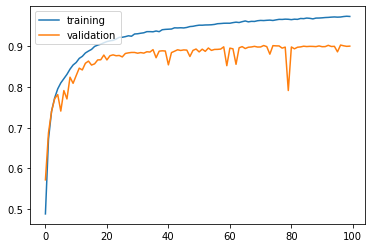

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [30]:
results = model.evaluate(X_test, y_test)

# loss값과 accuracy값을 리턴함
print(results)

10000/10000 [==============================] - 0s 22us/step
[0.48270821450371293, 0.9106000065803528]


In [31]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9106000065803528


relu로 activation function으로 바꾸니까 accuracy가 훨씬 좋아졌다!!

더 좋아지게 하는 방법을 생각해보자!

## 3. Optimizers

In [32]:
# 비록 sigmoid를 썼지만 adam을 썼기 때문에 결과가 좋음(밑의 그래프 참조)
# 
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [33]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

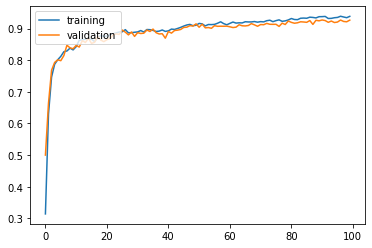

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 23us/step


In [36]:
print('Test accuracy: ', results[1])

Test accuracy:  0.925599992275238


accuracy가 엄청나게 좋아졌다!!!

그래도 다른 요소를 더 고려해보자

## 4. Batch Normalization

비선형 변환 전에 추가

참고 : 
- https://shuuki4.wordpress.com/2016/01/13/batch-normalization-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EA%B5%AC%ED%98%84/
- https://laonple.blog.me/220808903260

In [37]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())  ## 이것만 추가   (배치는 activation 전에 한다.)
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())     #
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())       #
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())       #
    model.add(Activation('sigmoid'))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [38]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

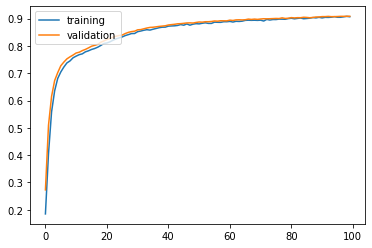

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [40]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 29us/step


In [41]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9118000268936157


여전히 GOOD!!

다른 것도 또 알아볼까?

---

## 5. Dropout (Regularization)

weight를 0으로 만들어주는 효과

In [42]:
# Droupout은 크게 잡는다.

def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                         # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [43]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

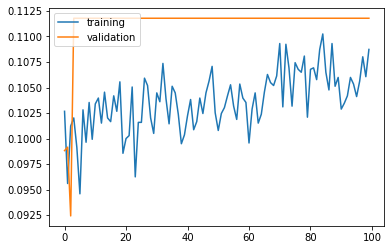

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [45]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/step


In [46]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


---

## 6. Model Ensemble

In [47]:
# argmax : 최대값의 인덱스 리턴

print(np.max([1,2,3,4,1,8, 2.4]))
print(np.argmax([1,2,3,4,1,8, 2.4]))
print(np.argmax([1,0,0,0,0,0,0]))
print('\n')



x = np.array([[1,0,0],
              [2,0,0],
              [0,0,1],
              [0,1,0]])

print(np.argmax(x))
print(np.argmax(x,axis=0))
print(np.argmax(x,axis=1))
pd.DataFrame(x)

8.0
5
0


3
[1 3 2]
[0 0 2 1]


,0,1,2
0,1,0,0
1,2,0,0
2,0,0,1
3,0,1,0


In [54]:
# 한 번만 run시킬 것!
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [55]:
print(y_train)
print(y_test)

[6 9 2 ... 5 5 3]
[7 2 1 ... 4 5 6]


In [56]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [13]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)

In [14]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), 
                                              ('model2', model2), 
                                              ('model3', model3)], 
                                voting = 'soft')

In [15]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.3655 - accuracy: 0.1021
Epoch 2/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3117 - accuracy: 0.1039
Epoch 3/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3024 - accuracy: 0.1135
Epoch 4/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3004 - accuracy: 0.1135
Epoch 5/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2998 - accuracy: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2994 - accuracy: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2991 - accuracy: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2987 - accuracy: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2984 - accuracy: 0.1135
Epoch 10/100
19800/19800 [====================

19800/19800 [==============================] - 1s 34us/step - loss: 2.2832 - accuracy: 0.1135
Epoch 54/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2828 - accuracy: 0.1135
Epoch 55/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2823 - accuracy: 0.1135
Epoch 56/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2818 - accuracy: 0.1135
Epoch 57/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2812 - accuracy: 0.1135
Epoch 58/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2807 - accuracy: 0.1135
Epoch 59/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2801 - accuracy: 0.1135
Epoch 60/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2795 - accuracy: 0.1135
Epoch 61/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2789 - accuracy: 0.1135
Epoch 62/100
19800/19800 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F76919D148>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F76919DA88>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F76919D188>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [ ]:
y_pred = ensemble_clf.predict(X_test)

In [ ]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

---

# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [17]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [26]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)



In [27]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), 
                                              ('model2', model2), 
                                              ('model3', model3), 
                                              ('model4', model4), 
                                              ('model5', model5)], 
                                voting = 'soft')

In [28]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.7676 - accuracy: 0.7629
Epoch 2/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.4351 - accuracy: 0.8752
Epoch 3/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.3672 - accuracy: 0.8946
Epoch 4/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.3217 - accuracy: 0.9076
Epoch 5/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.3009 - accuracy: 0.9145
Epoch 6/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.2813 - accuracy: 0.9194
Epoch 7/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2689 - accuracy: 0.9246
Epoch 8/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.2601 - accuracy: 0.9262
Epoch 9/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2502 - accuracy: 0.9288
Epoch 10/100
60000/60000 [====================

60000/60000 [==============================] - 4s 65us/step - loss: 0.1601 - accuracy: 0.9536
Epoch 53/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1562 - accuracy: 0.9534
Epoch 54/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1595 - accuracy: 0.9534
Epoch 55/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1586 - accuracy: 0.9540
Epoch 56/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1571 - accuracy: 0.9555
Epoch 57/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1585 - accuracy: 0.9541
Epoch 58/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1592 - accuracy: 0.9544
Epoch 59/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1563 - accuracy: 0.9547
Epoch 60/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1550 - accuracy: 0.9549
Epoch 61/100
60000/60000 [========================

60000/60000 [==============================] - ETA: 0s - loss: 0.3249 - accuracy: 0.90 - 4s 68us/step - loss: 0.3244 - accuracy: 0.9081
Epoch 5/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2994 - accuracy: 0.9141
Epoch 6/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2814 - accuracy: 0.9192
Epoch 7/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2673 - accuracy: 0.9245
Epoch 8/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2540 - accuracy: 0.9270
Epoch 9/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2491 - accuracy: 0.9294
Epoch 10/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2383 - accuracy: 0.9315
Epoch 11/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2334 - accuracy: 0.9344
Epoch 12/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2241 - accuracy: 0.9348
Epoch 13/100


60000/60000 [==============================] - 4s 64us/step - loss: 0.1559 - accuracy: 0.9535
Epoch 57/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1548 - accuracy: 0.9551
Epoch 58/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1579 - accuracy: 0.9542
Epoch 59/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1554 - accuracy: 0.9551
Epoch 60/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1576 - accuracy: 0.9538
Epoch 61/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1577 - accuracy: 0.9541
Epoch 62/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1561 - accuracy: 0.9538
Epoch 63/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1570 - accuracy: 0.9530
Epoch 64/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1567 - accuracy: 0.9544
Epoch 65/100
60000/60000 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F765ADDB88>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F765AF51C8>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F768AD8C48>),
                             ('model4',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F768AD8C88>),
                             ('model5',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F765AF5108>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [24]:
y_pred = ensemble_clf.predict(X_test)

In [25]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.9614
